In [1]:
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
import collections

#### Question 1: Module 7 -- Real world networks and features

1.a) Read the graph from http://networkrepository.com/ca-Erdos992.php

In [15]:
#After downloading I removed the first three rows and change the type to a txt file and read as follow
el = open ("ca-Erdos992.txt", 'rb') # open file and rb is for read-binary
G = nx.read_edgelist(el, nodetype=int) # edges on each line of the input
el.close()

1.b) For the given graph compute the degree distribution. (Do not use networkx library to compute the distribution)

Text(0.5, 0, 'Degree')

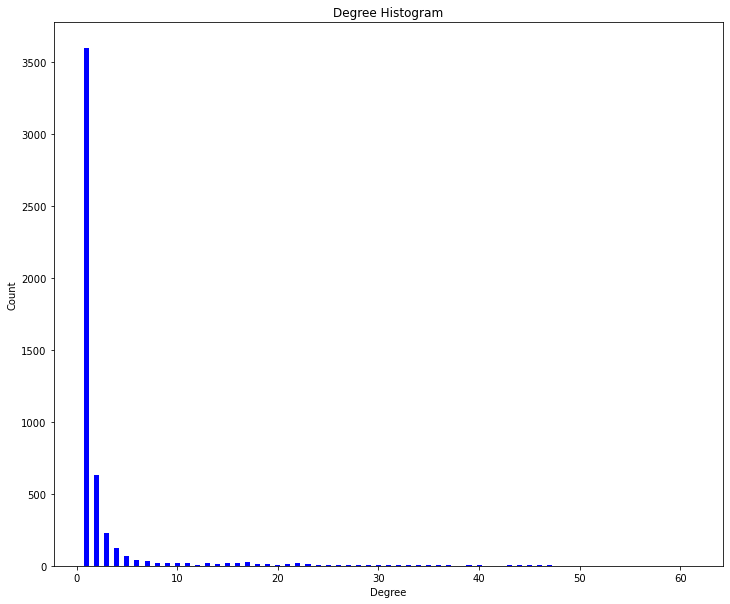

In [16]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence) #dict subclass for counting hashable objects
deg, cnt = zip(*degreeCount.items()) #counting and histogram on degree and #of nodes in that degree
#plotting
plt.figure(figsize=(12, 10))
plt.bar(deg, cnt, width=0.50, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

1.c) Plot a log-log graph of the distribution where x-axis represents log of degrees, and the y-axis represents log of frequency of the degrees. Does the plot show a linear decay?

Answer:

As the following plot shows, yes the plot shows a linear decay. frequency of degrees decreases as log of degrees increase.

Text(0.5, 0, 'log of Degrees')

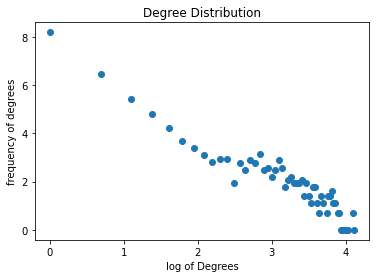

In [17]:
plt.scatter(np.log(deg), np.log(cnt))
plt.title("Degree Distribution")
plt.ylabel("frequency of degrees")
plt.xlabel("log of Degrees")

1.d) Determine alpha in the power law distribution using the equation

 alpha = 1 + n/(summation ln 𝑥_𝑖/(𝑥_min−1/2))
 - i ranges from 0 to number of degrees
 - where n in number of degrees
 - x_i is each degree in the degree array
 - x_min is the minimum degree

In [18]:
x_min = min(degree_sequence)
temp = sum([math.log(d/(x_min-0.5)) for d in degree_sequence])
alpha = 1 + len(G.nodes)/ temp
print(str(alpha));

1.888609888242263


#### Question 2: Module 8 -- Random graphs
*You may use networkx library*

2.a) Construct 5 random undirected graph with n = 1000, and probability 0.01, 0.1, 0.2, 0.3, 0.5 as G1, G2, G3, G4, and G5. Then find the size of the largest connected component. 

**Note : Use different seed value for each graph.**

In [19]:
np.random.seed(1)
G1 = nx.fast_gnp_random_graph(1000, 0.0001)
largest_cc1 = max(nx.connected_components(G1), key=len)
print("The size of the largest connected component for G1 : " + str(len(largest_cc1)))
#nx.draw_networkx(G1, pos=nx.spring_layout(G1), node_size=30, with_labels=False)

np.random.seed(2)
G2 = nx.fast_gnp_random_graph(1000, 0.001)
largest_cc2 = max(nx.connected_components(G2), key=len)
print("The size of the largest connected component for G2 : " + str(len(largest_cc2)))


np.random.seed(3)
G3 = nx.fast_gnp_random_graph(1000, 0.002)
largest_cc3 = max(nx.connected_components(G3), key=len)
print("The size of the largest connected component for G3 : " + str(len(largest_cc3)))

np.random.seed(4)
G4 = nx.fast_gnp_random_graph(1000, 0.003)
largest_cc4 = max(nx.connected_components(G4), key=len)
print("The size of the largest connected component for G4 : " + str(len(largest_cc4)))

np.random.seed(5)
G5 = nx.fast_gnp_random_graph(1000, 0.005)
largest_cc5 = max(nx.connected_components(G5), key=len)
print("The size of the largest connected component for G5 : " + str(len(largest_cc5)))


#nx.draw_networkx(G1, pos=nx.spring_layout(G1), node_size=30, with_labels=False)

The size of the largest connected component for G1 : 4
The size of the largest connected component for G2 : 97
The size of the largest connected component for G3 : 788
The size of the largest connected component for G4 : 927
The size of the largest connected component for G5 : 995


2.b) Plot the following

- x-axis probablity
- y-axis largest connected component

and infer what does increase in probablity mean with respect to the largest connected component


Answer:

As the following plot shows, number of the largest giant component increases as the probability increase.

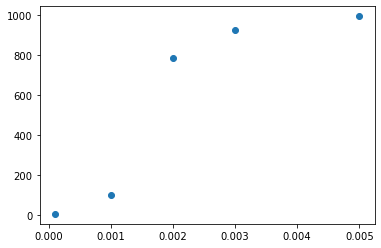

In [20]:
x = [0.0001, 0.001, 0.002, 0.003, 0.005]
Y = [len(largest_cc1),len(largest_cc2),len(largest_cc3),len(largest_cc4),len(largest_cc5)]
plt.scatter(x, Y)

2.c) For the same set of graphs, compute the average degree and plot probablity on the x-axis, and average degree on the y-axis


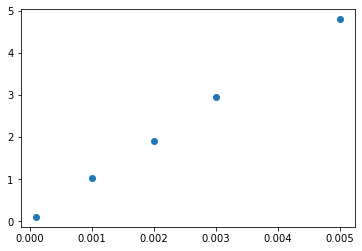

In [21]:
y1=sum(dict((G1.degree)).values())/1000
y2=sum(dict((G2.degree)).values())/1000
y3=sum(dict((G3.degree)).values())/1000
y4=sum(dict((G4.degree)).values())/1000
y5=sum(dict((G5.degree)).values())/1000
y =[y1, y2, y3, y4, y5]
plt.scatter(x, y)

2.d) Finally, compute the average size of the small component for each graph G1, ..., G5

In [23]:
y1=(1000-Y[0])/(nx.number_connected_components(G1)-1)
y2=(1000-Y[1])/(nx.number_connected_components(G2)-1)
y3=(1000-Y[2])/(nx.number_connected_components(G3)-1)
y4=(1000-Y[3])/(nx.number_connected_components(G4)-1)
y5=(1000-Y[4])/(nx.number_connected_components(G5)-1)
avg =[y1, y2, y3, y4, y5]
#plt.scatter(x, y)
print(avg)

[1.0495258166491044, 1.8391038696537678, 1.2544378698224852, 1.1774193548387097, 1.0]
